In [1]:
import numpy as np
from PIL import Image

In [6]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 5CC0-4D15

 Directory of c:\Users\EGE\gpnn\gpnn

17.05.2023  10:38    <DIR>          .
17.05.2023  10:38    <DIR>          ..
17.05.2023  10:38             2.470 experiments.ipynb
17.05.2023  10:38             1.087 LICENSE
               2 File(s)          3.557 bytes
               2 Dir(s)  75.661.778.944 bytes free


In [8]:
image = Image.open('people_on_the_beach.jpg')
image = np.asarray(image)
image.shape

(167, 250, 3)

In [9]:
from numpy.lib.stride_tricks import as_strided

def get_image_patches(image, patch_size):
    assert len(image.shape) == 3, "Image should have dimensions (width, height, channel)."
    assert image.shape[2] == 3, "Image should have 3 channels."

    stride_w = image.strides[0]  # stride of width
    stride_h = image.strides[1]  # stride of height
    stride_c = image.strides[2]  # stride of channel

    width, height, _ = image.shape
    patch_width, patch_height = patch_size, patch_size

    assert width >= patch_width, "Patch size should be less than or equal to image width."
    assert height >= patch_height, "Patch size should be less than or equal to image height."

    num_patches_w = width - patch_width + 1
    num_patches_h = height - patch_height + 1

    patches = as_strided(image, shape=(num_patches_w, num_patches_h, patch_width, patch_height, 3),
                         strides=(stride_w, stride_h, stride_w, stride_h, stride_c))

    return patches

# Test
patches = get_image_patches(image, 64)  # Divide the image into (10, 10, 3) patches
print(patches.shape)  # Should print: (91, 91, 10, 10, 3)


(104, 187, 64, 64, 3)


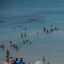

In [11]:
patch = Image.fromarray(patches[0,0])
patch

In [22]:
def create_patches(im, p):
    im = im.reshape(im.shape[0]/p, p, im.shape[1]/p, p, im.shape[2])
    return im.swapaxes(1, 2)

def completeness_similarity(Q, K, a):
    # Q, K are lists of patches (#patches, p, p)
    # a is the normalizing factor
    D = np.power(Q - K, 2) # patches axis uzerinden
    return D / (a + np.min(D, axis=1)) # axis=1 mi


def gpnn(x, y):
    
    # x is x_n
    # y is y_n+1
    return prediction